In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import glob
import os.path
import math as math

In [2]:
#Loading training data
X_train = []
y_train = []

N_train = 0

print("Loading training data")
for i in range(10):
    print("Start loading c" + str(i))
    path = os.path.join('data', 'train', 'c' + str(i), '*.jpg')
    files = glob.glob(path)
    
    N_train += len(files)
    n_img = 0
    for file in files:
        img = plt.imread(file,0)
        X_train.append(img)
        y_train.append(i)
        
        if n_img==200:
            break
        else:
            n_img += 1
        
    print("Done loading c" + str(i))
    
X_train = np.array(X_train)
y_train = np.array(y_train)

print("Done loading training data")

Loading training data
Start loading c0
Done loading c0
Start loading c1
Done loading c1
Start loading c2
Done loading c2
Start loading c3
Done loading c3
Start loading c4
Done loading c4
Start loading c5
Done loading c5
Start loading c6
Done loading c6
Start loading c7
Done loading c7
Start loading c8
Done loading c8
Start loading c9
Done loading c9
Done loading training data


In [3]:
#Loading test data
X_test = []
N_test = 0

print("Loading test data")
for i in range(10):
    path = os.path.join('data', 'test', '*.jpg')
    files = glob.glob(path)
    
    N_test = len(files)
    n_img = 0
    for file in files:
        img = plt.imread(file,0)
        X_test.append(img)
        
        if n_img==199:
            break
        else:
            n_img += 1
        

X_test = np.array(X_test)

print("Done loading test data")

Loading test data
Done loading test data


In [4]:
print("Number of training images: ", N_train)
print("Number of testing images: ", N_test)

Number of training images:  22424
Number of testing images:  79726


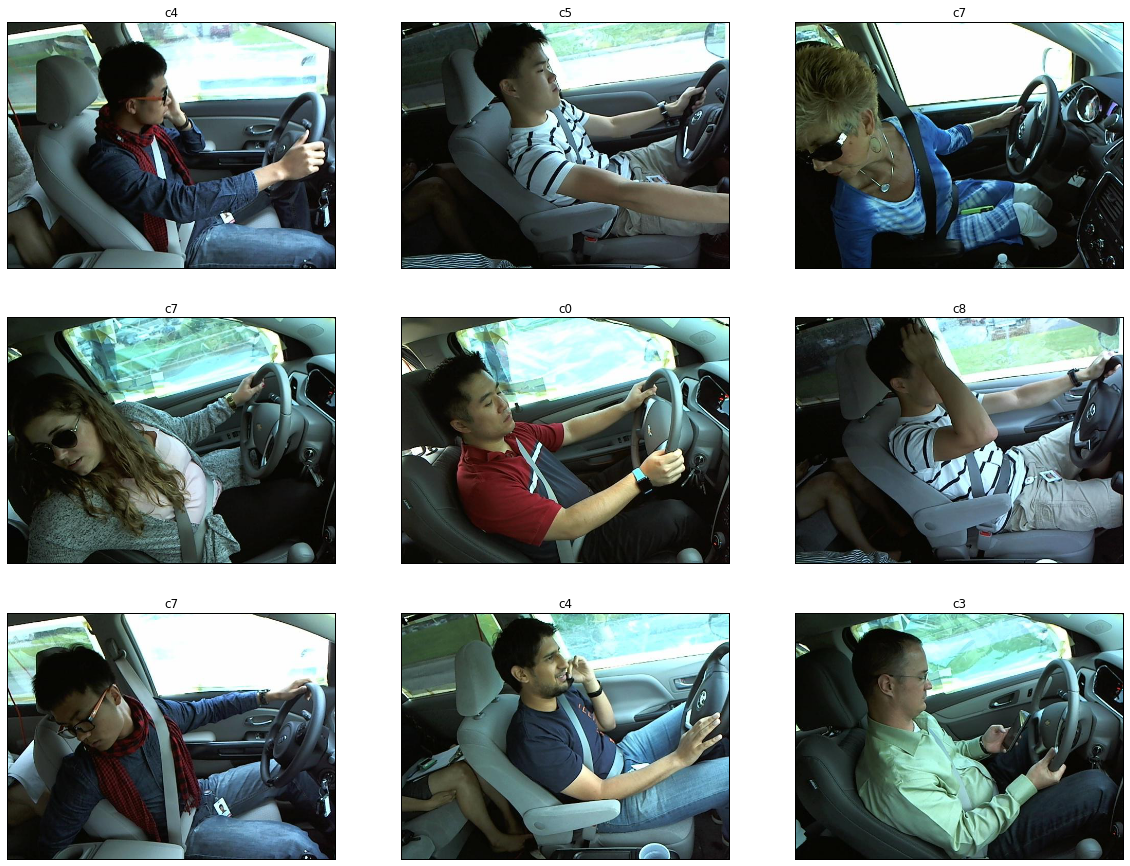

In [5]:
fig,ax = plt.subplots(3,3, figsize=(20,15))

indices = np.random.choice(len(y_train),9)
for i in range(9):
    axis = ax[i%3][math.floor(i/3)]
    axis.imshow(X_train[indices[i]])
    axis.set_title("c" + str(y_train[indices[i]]))
    axis.get_xaxis().set_visible(False)
    axis.get_yaxis().set_visible(False)

plt.show()

### Sample submission

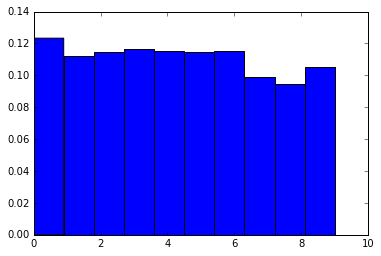

In [6]:
path = os.path.join('data', 'test', '*.jpg')
imgs = glob.glob(path)
imgs = [img[10:] for img in imgs]

tr = pd.read_csv('data/driver_imgs_list.csv')
tr['classname'] = [(int)(x[1]) for x in tr['classname']]
n, _, _ = plt.hist(tr['classname'], normed=1)

In [7]:
df_pred = pd.DataFrame()
df_pred["img"] = np.array(imgs).T

preds = []
for i in range(10):
    ci = np.ones(N_test)
    df_pred["c" + str(i)] = n[i]

In [8]:
df_pred.to_csv('results/result.txt', index=False)